In [2]:

import os
import os.path as osp
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt
 
import tifffile

import mylib.polSAR_utils as psr
import mylib.image_utils as iu

import solaris as sol
from solaris.data import data_dir
import skimage
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely.ops import cascaded_union

/home/csl/anaconda3/envs/solaris/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/csl/anaconda3/envs/solaris/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/csl/anaconda3/envs/solaris/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/csl/anaconda3/envs/solaris/lib/python3.7/site-

Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point or LineString
Geometry must be a Point 

255 0 (900, 900) uint8


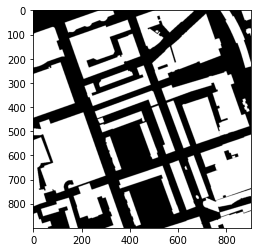

In [8]:
''' create mask '''
label_path = r'/home/csl/code/preprocess/data/SN6_extend/tile_label/900/geoms_601261_5753558.geojson'
img_path = r'/home/csl/code/preprocess/data/SN6_extend/tile_rgb/900/SN6_AOI_11_Rotterdam_PS-RGB_TrainVal_601261_5753558.tif'
# gdf = gpd.read_file(label_path)
# cascaded_union(gdf.geometry.values)
fp_mask = sol.vector.mask.footprint_mask(df=label_path,
                                      reference_im=img_path)
# f, ax = plt.subplots(figsize=(10, 10))
print(fp_mask.max(), fp_mask.min(), fp_mask.shape, fp_mask.dtype)
plt.imshow(fp_mask, cmap='gray')
# plt.imshow(fp_mask)

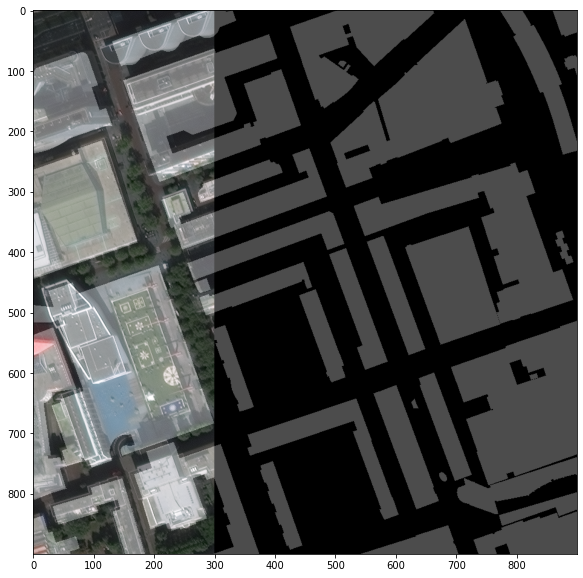

In [9]:
opacity = 0.7
img = plt.imread(img_path)
fp_mask = fp_mask
new_img = opacity * img.astype(np.float32) + (1-opacity)*fp_mask[..., None].astype(np.float32)
# new_img = img.astype(np.int32) + fp_mask[..., None].astype(np.int32)
new_img = new_img.clip(0, 255).astype(np.uint8)
f, ax = plt.subplots(figsize=(10, 10))
plt.imshow(new_img)